<a href="https://colab.research.google.com/github/utkarsh235/Machine-Learning-Projects/blob/master/Black_Friday_predictions/Black_Friday_Price_Prediction(Analytics_Vidhya).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sweetviz

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
train_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [ ]:
train_data['Age55+'] = 0
test_data['Age55+'] = 0
train_data['Stay4+'] = 0
test_data['Stay4+'] = 0

In [ ]:
for i in range(len(train_data)):
  if train_data['Age'][i] == '55+':
    train_data['Age55+'][i] = 1
  if train_data['Stay_In_Current_City_Years'][i] == '4+':
    train_data['Stay4+'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
for i in range(len(test_data)):
  if test_data['Age'][i] == '55+':
    test_data['Age55+'][i] = 1
  if test_data['Stay_In_Current_City_Years'][i] == '4+':
    test_data['Stay4+'][i] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data = pd.concat([train_data, test_data])
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN,0,1
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN,0,1
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN,0,1
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
#my_report  = sweetviz.analyze([data, 'data'], feat_cfg='Purchase')

In [ ]:
#my_report.show_html('mr.html')

In [ ]:
data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [ ]:
data['Occupation'].argmax()

9

In [ ]:
data['Occupation'].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

In [ ]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+
User_ID,1.000000,-0.023976,0.020276,0.004568,0.002291,0.002490,0.004716,-0.004866,-0.019644
Occupation,-0.023976,1.000000,0.023563,-0.008441,-0.000773,0.010450,0.020833,0.044180,0.012904
Marital_Status,0.020276,0.023563,1.000000,0.019579,0.017131,0.018471,-0.000463,0.090960,-0.007679
Product_Category_1,0.004568,-0.008441,0.019579,1.000000,0.540426,0.228299,-0.343703,0.032572,0.007134
Product_Category_2,0.002291,-0.000773,0.017131,0.540426,1.000000,0.543578,-0.209918,0.024353,0.005702
Product_Category_3,0.002490,0.010450,0.018471,0.228299,0.543578,1.000000,-0.022006,0.024020,0.004836
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000,0.002904,0.000988
Age55+,-0.004866,0.044180,0.090960,0.032572,0.024353,0.024020,0.002904,1.000000,0.010541
Stay4+,-0.019644,0.012904,-0.007679,0.007134,0.005702,0.004836,0.000988,0.010541,1.000000


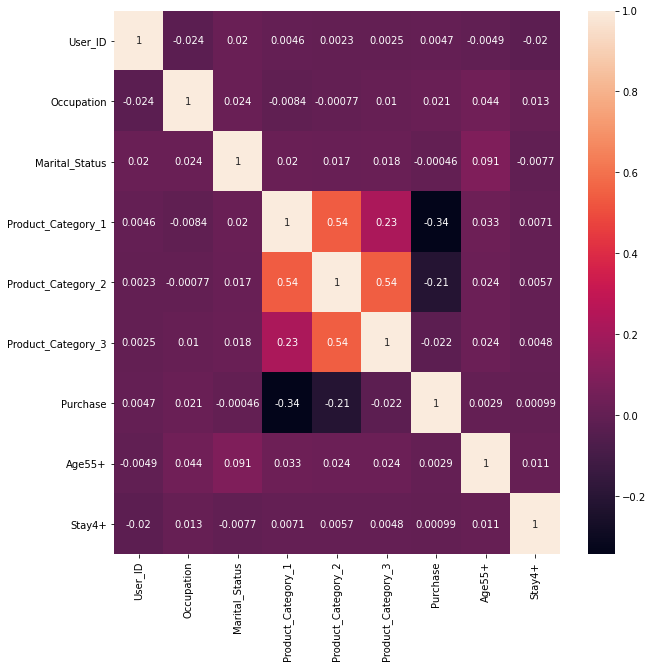

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

### **Handling NULL Values**

In [ ]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
Age55+                             0
Stay4+                             0
dtype: int64

In [ ]:
data.dtypes
#texttypes = ['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Age55+                          int64
Stay4+                          int64
dtype: object

In [ ]:
data['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

In [ ]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [ ]:
from scipy import stats
data['Gender'].fillna(value = 'M', inplace = True)
data['Occupation'].fillna(value = 4.0, inplace = True)
data['City_Category'].fillna('B', inplace = True)
data['Stay_In_Current_City_Years'].fillna('1', inplace = True)
data['Marital_Status'].fillna(0.0, inplace = True)
data['Product_Category_1'].fillna(0.0, inplace = True)

In [ ]:
data['Product_Category_2'].fillna(value = 0.0, inplace = True)
data['Product_Category_3'].fillna(value = 1.0, inplace = True)

In [ ]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
Age55+                             0
Stay4+                             0
dtype: int64

## **Encoding Text Data**

In [ ]:
texttypes = ['Product_ID', 'Gender', 'Age', 'City_Category']

In [ ]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
data['Stay_In_Current_City_Years'].replace(to_replace = '4+', value = '4', inplace = True)

In [ ]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(int)

In [ ]:
data['Stay_In_Current_City_Years'].dtype

dtype('int64')

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,1.0,8370.0,0,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,1.0,1422.0,0,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1.0,1057.0,0,0
4,1000002,P00285442,M,55+,16,C,4,0,8,0.0,1.0,7969.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4,1,8,0.0,1.0,NaN,0,1
783663,1006036,P00254642,F,26-35,15,B,4,1,5,8.0,1.0,NaN,0,1
783664,1006036,P00031842,F,26-35,15,B,4,1,1,5.0,12.0,NaN,0,1
783665,1006037,P00124742,F,46-50,1,C,4,0,10,16.0,1.0,NaN,0,1


In [ ]:
# Algorithmic Label Encoder on  => Product_ID, City_Category
# Our Label Encoder on => Age 
# Dummy Variables on => Gender

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [ ]:
ale = ['Product_ID']
ole = ['Age', 'City_Category']
dv = ['Gender']

In [ ]:
for i in range(len(ale)):
  le.fit(data[ale[i]])
  data[ale[i]] = le.transform(data[ale[i]])

In [ ]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+
0,1000001,684,F,0-17,10,A,2,0,3,0.0,1.0,8370.0,0,0
1,1000001,2406,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,868,F,0-17,10,A,2,0,12,0.0,1.0,1422.0,0,0
3,1000001,844,F,0-17,10,A,2,0,12,14.0,1.0,1057.0,0,0
4,1000002,2769,M,55+,16,C,4,0,8,0.0,1.0,7969.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,1118,F,26-35,15,B,4,1,8,0.0,1.0,NaN,0,1
783663,1006036,2463,F,26-35,15,B,4,1,5,8.0,1.0,NaN,0,1
783664,1006036,315,F,26-35,15,B,4,1,1,5.0,12.0,NaN,0,1
783665,1006037,1175,F,46-50,1,C,4,0,10,16.0,1.0,NaN,0,1


In [ ]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
data['Age'][i]

'0-17'

In [ ]:
#cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
#                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
#                                  "two": 2, "twelve": 12, "three":3 }}

In [ ]:
maps = {"Age": {'0-17': 8, '18-25': 22, '26-35': 31, '36-45': 40, '46-50': 48, '51-55': 53, '55+': 60},
        "City_Category": {'A': 0, 'B': 1, 'C': 2}
}

In [ ]:
data.replace(maps, inplace = True)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+
0,1000001,684,F,8,10,0,2,0,3,0.0,1.0,8370.0,0,0
1,1000001,2406,F,8,10,0,2,0,1,6.0,14.0,15200.0,0,0
2,1000001,868,F,8,10,0,2,0,12,0.0,1.0,1422.0,0,0
3,1000001,844,F,8,10,0,2,0,12,14.0,1.0,1057.0,0,0
4,1000002,2769,M,60,16,2,4,0,8,0.0,1.0,7969.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,1118,F,31,15,1,4,1,8,0.0,1.0,NaN,0,1
783663,1006036,2463,F,31,15,1,4,1,5,8.0,1.0,NaN,0,1
783664,1006036,315,F,31,15,1,4,1,1,5.0,12.0,NaN,0,1
783665,1006037,1175,F,48,1,2,4,0,10,16.0,1.0,NaN,0,1


In [ ]:
gd = pd.get_dummies(data['Gender'])
data = pd.concat([data, gd], axis = 1)
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+,F,M
0,1000001,684,F,8,10,0,2,0,3,0.0,1.0,8370.0,0,0,1,0
1,1000001,2406,F,8,10,0,2,0,1,6.0,14.0,15200.0,0,0,1,0
2,1000001,868,F,8,10,0,2,0,12,0.0,1.0,1422.0,0,0,1,0
3,1000001,844,F,8,10,0,2,0,12,14.0,1.0,1057.0,0,0,1,0
4,1000002,2769,M,60,16,2,4,0,8,0.0,1.0,7969.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,1118,F,31,15,1,4,1,8,0.0,1.0,NaN,0,1,1,0
783663,1006036,2463,F,31,15,1,4,1,5,8.0,1.0,NaN,0,1,1,0
783664,1006036,315,F,31,15,1,4,1,1,5.0,12.0,NaN,0,1,1,0
783665,1006037,1175,F,48,1,2,4,0,10,16.0,1.0,NaN,0,1,1,0


In [ ]:
data.drop(['Gender'], axis = 1, inplace= True)

In [ ]:
data

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+,F,M
0,1000001,684,8,10,0,2,0,3,0.0,1.0,8370.0,0,0,1,0
1,1000001,2406,8,10,0,2,0,1,6.0,14.0,15200.0,0,0,1,0
2,1000001,868,8,10,0,2,0,12,0.0,1.0,1422.0,0,0,1,0
3,1000001,844,8,10,0,2,0,12,14.0,1.0,1057.0,0,0,1,0
4,1000002,2769,60,16,2,4,0,8,0.0,1.0,7969.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,1118,31,15,1,4,1,8,0.0,1.0,NaN,0,1,1,0
783663,1006036,2463,31,15,1,4,1,5,8.0,1.0,NaN,0,1,1,0
783664,1006036,315,31,15,1,4,1,1,5.0,12.0,NaN,0,1,1,0
783665,1006037,1175,48,1,2,4,0,10,16.0,1.0,NaN,0,1,1,0


In [ ]:
data.dtypes

User_ID                         int64
Product_ID                      int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
Age55+                          int64
Stay4+                          int64
F                               uint8
M                               uint8
dtype: object

In [ ]:
## Yes!!, we're done with encoding
## Now let's move on to Scaling the Features

## **Scaling**

In [ ]:
#But before appling Standard Scaling first lets again de_concatinate the train and test data

In [ ]:
len(train_data)

550068

In [ ]:
train = data[:len(train_data)]
test = data[len(train_data):]

In [ ]:
len(train_data)

550068

In [ ]:
len(test_data)

233599

In [ ]:
test

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+,F,M
550068,1000004,1216,48,7,1,2,1,1,11.0,1.0,NaN,0,0,0,1
550069,1000009,1063,31,17,2,0,0,3,5.0,1.0,NaN,0,0,0,1
550070,1000010,2799,40,1,1,4,1,5,14.0,1.0,NaN,0,1,1,0
550071,1000010,1379,40,1,1,4,1,4,9.0,1.0,NaN,0,1,1,0
550072,1000011,535,31,1,2,1,0,4,5.0,12.0,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,1118,31,15,1,4,1,8,0.0,1.0,NaN,0,1,1,0
783663,1006036,2463,31,15,1,4,1,5,8.0,1.0,NaN,0,1,1,0
783664,1006036,315,31,15,1,4,1,1,5.0,12.0,NaN,0,1,1,0
783665,1006037,1175,48,1,2,4,0,10,16.0,1.0,NaN,0,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
train[['Purchase']] = ss.fit_transform(train[['Purchase']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
train_x = train.drop(['Purchase'], axis = 1)
train_y = train['Purchase']
test_x = test.drop(['Purchase'], axis = 1)
test_y = test['Purchase']

In [ ]:
train_y

0        -0.177973
1         1.181756
2        -1.561193
3        -1.633858
4        -0.257805
            ...   
550063   -1.771025
550064   -1.770428
550065   -1.817013
550066   -1.771623
550067   -1.746737
Name: Purchase, Length: 550068, dtype: float64

In [ ]:
[train_x['User_ID']]

[0         1000001
 1         1000001
 2         1000001
 3         1000001
 4         1000002
            ...   
 550063    1006033
 550064    1006035
 550065    1006036
 550066    1006038
 550067    1006039
 Name: User_ID, Length: 550068, dtype: int64]

In [ ]:
test1 = test

In [ ]:
test1

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+,F,M
550068,1000004,1216,48,7,1,2,1,1,11.0,1.0,NaN,0,0,0,1
550069,1000009,1063,31,17,2,0,0,3,5.0,1.0,NaN,0,0,0,1
550070,1000010,2799,40,1,1,4,1,5,14.0,1.0,NaN,0,1,1,0
550071,1000010,1379,40,1,1,4,1,4,9.0,1.0,NaN,0,1,1,0
550072,1000011,535,31,1,2,1,0,4,5.0,12.0,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,1118,31,15,1,4,1,8,0.0,1.0,NaN,0,1,1,0
783663,1006036,2463,31,15,1,4,1,5,8.0,1.0,NaN,0,1,1,0
783664,1006036,315,31,15,1,4,1,1,5.0,12.0,NaN,0,1,1,0
783665,1006037,1175,48,1,2,4,0,10,16.0,1.0,NaN,0,1,1,0


In [ ]:
train_x[['User_ID']] = ss.fit_transform(train_x[['User_ID']])
test_x[['User_ID']] = ss.transform(test_x[['User_ID']])
test1[['User_ID']] = ss.transform(test1[['User_ID']])

train_x[['Product_ID']] = ss.fit_transform(train_x[['Product_ID']])
test_x[['Product_ID']] = ss.transform(test_x[['Product_ID']])
test1[['Product_ID']] = ss.transform(test1[['Product_ID']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [ ]:
train_x

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age55+,Stay4+,F,M
0,-1.752639,-1.022167,8,10,0,2,0,3,0.0,1.0,0,0,1,0
1,-1.752639,0.658509,8,10,0,2,0,1,6.0,14.0,0,0,1,0
2,-1.752639,-0.842582,8,10,0,2,0,12,0.0,1.0,0,0,1,0
3,-1.752639,-0.866007,8,10,0,2,0,12,14.0,1.0,0,0,1,0
4,-1.752061,1.012798,60,16,2,4,0,8,0.0,1.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1.738930,1.835568,53,13,1,1,1,20,0.0,1.0,0,0,0,1
550064,1.740087,1.836544,31,1,2,3,0,20,0.0,1.0,0,0,1,0
550065,1.740666,1.836544,31,15,1,4,1,20,0.0,1.0,0,1,1,0
550066,1.741824,1.836544,60,1,2,2,0,20,0.0,1.0,1,0,1,0


In [ ]:
'''from imblearn.over_sampling import RandomOverSampler
>>> ros = RandomOverSampler(random_state=0)
>>> X_resampled, y_resampled = ros.fit_resample(X, y)'''

'from imblearn.over_sampling import RandomOverSampler\nros = RandomOverSampler(random_state=0)\nX_resampled, y_resampled = ros.fit_resample(X, y)'

In [ ]:
'''from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 42)
c = train_x.drop(['Occupation'], axis = 1)
v = train_x['Occupation']
c, v = ros.fit_resample(c, v)'''

"from imblearn.over_sampling import RandomOverSampler\nros = RandomOverSampler(random_state = 42)\nc = train_x.drop(['Occupation'], axis = 1)\nv = train_x['Occupation']\nc, v = ros.fit_resample(c, v)"

In [ ]:
#c

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
train_x = pca.fit_transform(train_x)
test_x = pca.fit_transform(test_x)
#test1 = pca.fit_transform(test1)

In [ ]:
test1

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+,F,M
550068,-1.750903,-0.502934,48,7,1,2,1,1,11.0,1.0,NaN,0,0,0,1
550069,-1.748009,-0.652262,31,17,2,0,0,3,5.0,1.0,NaN,0,0,0,1
550070,-1.747430,1.042078,40,1,1,4,1,5,14.0,1.0,NaN,0,1,1,0
550071,-1.747430,-0.343845,40,1,1,4,1,4,9.0,1.0,NaN,0,1,1,0
550072,-1.746851,-1.167591,31,1,2,1,0,4,5.0,12.0,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1.740666,-0.598582,31,15,1,4,1,8,0.0,1.0,NaN,0,1,1,0
783663,1.740666,0.714141,31,15,1,4,1,5,8.0,1.0,NaN,0,1,1,0
783664,1.740666,-1.382312,31,15,1,4,1,1,5.0,12.0,NaN,0,1,1,0
783665,1.741245,-0.542950,48,1,2,4,0,10,16.0,1.0,NaN,0,1,1,0


In [ ]:
train_x

array([[ 2.65350895e+01, -1.78204668e+00, -7.56796784e+00, ...,
        -1.80095087e+00,  7.25133420e-01,  1.15002685e+00],
       [ 2.65590912e+01,  7.51643312e+00,  1.26400212e+00, ...,
        -2.37591112e-02,  8.30089389e-01,  1.22894220e+00],
       [ 2.63153170e+01, -3.46205866e+00, -8.99676133e+00, ...,
        -1.69287594e+00,  7.14212032e-01,  1.10067143e+00],
       ...,
       [ 2.76992559e+00, -2.80666440e+00, -1.26019920e+01, ...,
         2.30828250e+00,  1.04973688e-01,  1.05941703e+00],
       [-2.50066718e+01, -1.42510964e+01, -1.09286138e+00, ...,
         2.15986471e+00, -7.63754547e-01,  8.40128516e-01],
       [-1.29705263e+01, -1.42622405e+01, -1.04408943e+00, ...,
         2.23174943e+00,  1.91065997e-01,  8.85261645e-01]])

In [ ]:
from sklearn.model_selection import train_test_split
train_x1, test_x1, train_y1, test_y1 = train_test_split(train_x, train_y, test_size = 0.3)

In [ ]:
test_y1

129226   -0.418663
128300    1.971911
63952    -0.772033
306020   -0.263578
27695    -1.243260
            ...   
482722    1.283088
29885    -0.181357
15940     1.232920
170965    2.214990
444505    1.198280
Name: Purchase, Length: 165021, dtype: float64

In [ ]:
test_y1 = ss.inverse_transform(test_y1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(train_x1, train_y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)
from sklearn.metrics import mean_squared_error

In [ ]:
pred = lr.predict(test_x1)
pred = ss.inverse_transform(pred)

In [ ]:
pred

array([2120.5863896 , 2237.57047475, 1540.32418503, ..., 1851.74431744,
        854.8139029 , 1978.10212086])

In [ ]:
test_y1

array([1302.3428598 , 3751.69557887,  940.28414259, ..., 2994.53391222,
       4000.75118097, 2959.04195909])

In [ ]:
mse = mean_squared_error(test_y1, pred)

In [ ]:
import math
rmse = math.sqrt(mse)
rmse

941.705188755327

In [ ]:
#941.8440679948432

In [ ]:
#from sklearn.svm import SVR
#svr = SVR()

In [ ]:
#svr.fit(train_x1, train_y1)

In [ ]:
#pred_svr = svr.predict(test_x1)

In [ ]:
#mse_svr = mean_squared_error(test_y1, pred_svr)

In [ ]:
#rmse_svr = math.sqrt(mse_svr)
#rmse_svr

In [ ]:
#from sklearn.neighbors import NearestCentroid
#nc = NearestCentroid()

In [ ]:
#nc.fit(train_x1, train_y1)

In [ ]:
#pred_nc = nc.predict(test_x1)

In [ ]:
#mse_nc = mean_squared_error(test_y1, pred_nc)
#rmse = math.sqrt(mse_nc)
#rmse

In [ ]:
from sklearn.linear_model import Lasso
la = Lasso(alpha = 0.000000001, max_iter = 1000, selection = 'random')

In [ ]:
la.fit(train_x1, train_y1)

Lasso(alpha=1e-09, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='random', tol=0.0001, warm_start=False)

In [ ]:
pred_la = la.predict(test_x1)

In [ ]:
mse_la = mean_squared_error(test_y1, pred_la)
rmse = math.sqrt(mse_la)
rmse

2013.5646425307302

In [ ]:
#2012.305180274918

#4607.042244261084 alpha 1
#4607.0312724810365 alpha 0.1
#4607.030269215977 alpha 0.01
#4607.03015853649 alpha e^-10

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha= 0.0000000001)

In [ ]:
rid.fit(train_x1, train_y1)

Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
pred_rid = rid.predict(test_x1)
mse = mean_squared_error(test_y1, pred_rid)
rmse = math.sqrt(mse)
rmse

2013.5646425305315

In [ ]:
#2012.3051802748312
#2010.0976656924656

In [ ]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()

In [ ]:
en.fit(train_x1, train_y1)
pred_en = en.predict(test_x1)

In [ ]:
mse_en = mean_squared_error(test_y1, pred_en)
rmse_en = math.sqrt(mse_en)
rmse_en

2013.607469020976

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, BatchNormalization 
from keras.models import Sequential 
rfr = RandomForestRegressor()

In [ ]:
model = Sequential()

In [ ]:
train_x1[0].shape

(10,)

In [ ]:
model.add(Dense(1024, activation = 'relu', input_shape=train_x1[0].shape))
model.add(Dense(1024, activation = 'relu', kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(512, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(512, activation = 'relu', kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(256, activation = 'relu', kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(128, activation = 'relu', kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(64, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(64, activation = 'relu', kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(32, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(32, activation = 'relu', kernel_initializer='normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(16, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(4, activation = 'relu', kernel_initializer='normal'))
model.add(Dense(1, activation = 'linear', kernel_initializer='normal'))

In [ ]:
model.compile(
    optimizer = 'Adagrad', 
    loss = 'mean_squared_error',
    metrics = ['mean_squared_error']
)

In [ ]:
model.fit(train_x1, train_y1, batch_size = 200000, epochs = 10, validation_data=(test_x1, test_y1))

Train on 385047 samples, validate on 165021 samples
Epoch 1/10
385047/385047 [==============================] - 6s 15us/step - loss: 0.9988 - mean_squared_error: 0.9988 - val_loss: 4054765.0000 - val_mean_squared_error: 4054765.0000
Epoch 2/10
385047/385047 [==============================] - 5s 12us/step - loss: 0.9986 - mean_squared_error: 0.9986 - val_loss: 4054755.5000 - val_mean_squared_error: 4054755.5000
Epoch 3/10
385047/385047 [==============================] - 5s 12us/step - loss: 0.9948 - mean_squared_error: 0.9948 - val_loss: 4054600.5000 - val_mean_squared_error: 4054600.5000
Epoch 4/10
385047/385047 [==============================] - 5s 12us/step - loss: 0.9804 - mean_squared_error: 0.9804 - val_loss: 4052540.7500 - val_mean_squared_error: 4052540.7500
Epoch 5/10
385047/385047 [==============================] - 5s 12us/step - loss: 0.9446 - mean_squared_error: 0.9446 - val_loss: 4037627.7500 - val_mean_squared_error: 4037627.7500
Epoch 6/10
385047/385047 [=================

In [ ]:
#model.fit(train_x1, train_y1, batch_size = 100000, epochs = 200, validation_data=(test_x1, test_y1))

In [ ]:
#model.fit(train_x1, train_y1, batch_size = 200000, epochs = 100, validation_data=(test_x1, test_y1))

In [ ]:
#model.fit(train_x1, train_y1, batch_size = 200000, epochs = 500, validation_data=(test_x1, test_y1))

In [ ]:
#model.save('model1.h5')

In [ ]:
print(math.sqrt(4051747.6227))
print(math.sqrt(4051486.9101))
print(math.sqrt(4051216.6832))
print(math.sqrt(4051364.2500))

2012.895333269964
2012.8305716328932
2012.763444421624
2012.800101848169


In [ ]:
test_y1

array([1302.3428598 , 3751.69557887,  940.28414259, ..., 2994.53391222,
       4000.75118097, 2959.04195909])

In [ ]:
#rfr.fit(train_x1, train_y1)

In [ ]:
#pred_rfr = rfr.predict(test_y1)

In [ ]:
#mse_rfr = mean_squared_error(test_y1, pred_rfr)
#rmse_rfr = math.sqrt(mse_rfr)
#rmse_rfr

In [ ]:
sample_submission

,Purchase,User_ID,Product_ID
0,100,1000004,P00128942
1,100,1000009,P00113442
2,100,1000010,P00288442
3,100,1000010,P00145342
4,100,1000011,P00053842
...,...,...,...
233594,100,1006036,P00118942
233595,100,1006036,P00254642
233596,100,1006036,P00031842
233597,100,1006037,P00124742


In [ ]:
test

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+,F,M
550068,-1.750903,-0.502934,48,7,1,2,1,1,11.0,1.0,NaN,0,0,0,1
550069,-1.748009,-0.652262,31,17,2,0,0,3,5.0,1.0,NaN,0,0,0,1
550070,-1.747430,1.042078,40,1,1,4,1,5,14.0,1.0,NaN,0,1,1,0
550071,-1.747430,-0.343845,40,1,1,4,1,4,9.0,1.0,NaN,0,1,1,0
550072,-1.746851,-1.167591,31,1,2,1,0,4,5.0,12.0,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1.740666,-0.598582,31,15,1,4,1,8,0.0,1.0,NaN,0,1,1,0
783663,1.740666,0.714141,31,15,1,4,1,5,8.0,1.0,NaN,0,1,1,0
783664,1.740666,-1.382312,31,15,1,4,1,1,5.0,12.0,NaN,0,1,1,0
783665,1.741245,-0.542950,48,1,2,4,0,10,16.0,1.0,NaN,0,1,1,0


In [ ]:
test1

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+,F,M
550068,-1.750903,-0.502934,48,7,1,2,1,1,11.0,1.0,NaN,0,0,0,1
550069,-1.748009,-0.652262,31,17,2,0,0,3,5.0,1.0,NaN,0,0,0,1
550070,-1.747430,1.042078,40,1,1,4,1,5,14.0,1.0,NaN,0,1,1,0
550071,-1.747430,-0.343845,40,1,1,4,1,4,9.0,1.0,NaN,0,1,1,0
550072,-1.746851,-1.167591,31,1,2,1,0,4,5.0,12.0,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1.740666,-0.598582,31,15,1,4,1,8,0.0,1.0,NaN,0,1,1,0
783663,1.740666,0.714141,31,15,1,4,1,5,8.0,1.0,NaN,0,1,1,0
783664,1.740666,-1.382312,31,15,1,4,1,1,5.0,12.0,NaN,0,1,1,0
783665,1.741245,-0.542950,48,1,2,4,0,10,16.0,1.0,NaN,0,1,1,0


In [ ]:
test1 = test

In [ ]:
test1

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age55+,Stay4+,F,M
550068,-1.750903,-0.502934,48,7,1,2,1,1,11.0,1.0,NaN,0,0,0,1
550069,-1.748009,-0.652262,31,17,2,0,0,3,5.0,1.0,NaN,0,0,0,1
550070,-1.747430,1.042078,40,1,1,4,1,5,14.0,1.0,NaN,0,1,1,0
550071,-1.747430,-0.343845,40,1,1,4,1,4,9.0,1.0,NaN,0,1,1,0
550072,-1.746851,-1.167591,31,1,2,1,0,4,5.0,12.0,NaN,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1.740666,-0.598582,31,15,1,4,1,8,0.0,1.0,NaN,0,1,1,0
783663,1.740666,0.714141,31,15,1,4,1,5,8.0,1.0,NaN,0,1,1,0
783664,1.740666,-1.382312,31,15,1,4,1,1,5.0,12.0,NaN,0,1,1,0
783665,1.741245,-0.542950,48,1,2,4,0,10,16.0,1.0,NaN,0,1,1,0


In [ ]:
test1.drop(['Purchase'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test1

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age55+,Stay4+,F,M
550068,-1.750903,-0.502934,48,7,1,2,1,1,11.0,1.0,0,0,0,1
550069,-1.748009,-0.652262,31,17,2,0,0,3,5.0,1.0,0,0,0,1
550070,-1.747430,1.042078,40,1,1,4,1,5,14.0,1.0,0,1,1,0
550071,-1.747430,-0.343845,40,1,1,4,1,4,9.0,1.0,0,1,1,0
550072,-1.746851,-1.167591,31,1,2,1,0,4,5.0,12.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1.740666,-0.598582,31,15,1,4,1,8,0.0,1.0,0,1,1,0
783663,1.740666,0.714141,31,15,1,4,1,5,8.0,1.0,0,1,1,0
783664,1.740666,-1.382312,31,15,1,4,1,1,5.0,12.0,0,1,1,0
783665,1.741245,-0.542950,48,1,2,4,0,10,16.0,1.0,0,1,1,0


In [ ]:
test1 = pca.fit_transform(test1)

In [ ]:
print(test1)

[[-13.23365251  -0.95101504   2.8448556  ...  -1.25350327   0.1022954
   -0.29231628]
 [  3.00213559   6.39230687  -7.19209258 ...  -1.3937028   -1.05079779
   -0.24039346]
 [ -4.94365606  -4.9220596    7.00987509 ...   0.28979284   0.05039881
    1.07204345]
 ...
 [  3.24038107   8.45824635  -0.47085075 ...  -0.37711959   0.14258379
    1.1267478 ]
 [-13.06748444  -5.33890182   7.86696855 ...   0.27679392  -0.81327968
    0.86689404]
 [-12.6390985   -9.58538027   1.69142931 ...   1.80618322   0.20315069
    0.95812526]]


In [ ]:
test_pred = model.predict(test1)

In [ ]:
test_pred = ss.inverse_transform(test_pred)

In [ ]:
test_pred

array([[20737.135 ],
       [15023.607 ],
       [ 1608.5844],
       ...,
       [32926.934 ],
       [ 1605.7874],
       [ 1603.1178]], dtype=float32)

In [ ]:
sample_submission1 = sample_submission

In [ ]:
sample_submission1['Purchase'] = test_pred

In [ ]:
sample_submission1

,Purchase,User_ID,Product_ID
0,20737.134766,1000004,P00128942
1,15023.607422,1000009,P00113442
2,1608.584351,1000010,P00288442
3,1603.396118,1000010,P00145342
4,10759.337891,1000011,P00053842
...,...,...,...
233594,1613.924927,1006036,P00118942
233595,3009.021484,1006036,P00254642
233596,32926.933594,1006036,P00031842
233597,1605.787354,1006037,P00124742


In [ ]:
sample_submission1.to_csv('sample_submission1.csv')